# Logistic Regression for Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np


#from nltk.stem.porter import PorterStemmer
import re
import nltk
import string
#from nltk.corpus import stopwords
from __future__ import division

from sklearn.feature_extraction.text import HashingVectorizer


In [2]:
df = pd.read_csv('shuffled_movie_data.csv')

In [3]:
stop = nltk.corpus.stopwords.words('english')
porter = nltk.stem.porter.PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    
    text = [w for w in text.split() if w not in stop]
    
    tokenized = [porter.stem(w) for w in text] #trying to avoid redundancy
    return text

# It turns a collection of text documents into a scipy.sparse matrix holding 
# token occurrence counts
vect = HashingVectorizer(decode_error='ignore', 
                         n_features=2**21,
                         preprocessor=None, 
                         tokenizer=tokenizer)

def stream_docs(path):
    with open(path, 'r') as csv:
        next(csv) # skip header
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label  #returns a fuck generator(read once)
            
def get_minibatch(doc_stream, size):
    docs, y = [], []
    for _ in range(size):
        text, label = next(doc_stream)
        docs.append(text)
        y.append(label)
    return docs, y    

### Excercise 1: define new features

In [4]:
#this will take a while
doc_stream = stream_docs(path='shuffled_movie_data.csv')
X_test, y_test = get_minibatch(doc_stream, size=50000)

all_words = tokenizer(" ".join(X_test))     
all_words = nltk.FreqDist(all_words)


In [5]:
number_of_words = 500
important_words = all_words.most_common(number_of_words)
important_words = [ x[0] for x in important_words ]
print important_words


['movie', 'film', 'one', 'like', 'good', 'time', 'even', 'would', 'story', 'really', 'see', 'well', 'much', 'bad', 'get', 'people', 'great', 'also', 'first', 'made', 'make', 'way', 'could', 'movies', 'characters', 'think', 'watch', 'character', 'films', 'two', 'many', 'seen', 'love', 'never', 'plot', 'life', 'acting', 'show', 'best', 'know', 'little', 'ever', 'man', 'better', 'end', 'scene', 'still', 'say', 'scenes', 'something', 'go', 'back', 'real', 'thing', 'watching', 'actors', 'director', 'years', 'funny', 'though', 'old', 'another', 'work', '10', 'actually', 'nothing', 'makes', 'look', 'find', 'going', 'new', 'lot', 'every', 'part', 'world', 'cast', 'us', 'things', 'want', 'quite', 'pretty', 'horror', 'around', 'seems', 'young', 'take', 'however', 'big', 'got', 'thought', 'fact', 'enough', 'long', 'give', 'may', 'comedy', 'series', 'must', 'right', 'action', 'music', 'without', 'guy', 'times', 'saw', 'always', 'original', 'role', 'come', 'almost', 'gets', 'point', 'interesting', 

In [6]:
#SOME CLEANING
def remove_punctuation(text):    
    return text.translate(None, string.punctuation) 

# Remove punctuation.
df['review_clean'] = df['review'].apply(remove_punctuation)

#This will take a while
for word in important_words:
    df[word] = df['review_clean'].apply(lambda s : s.split().count(word))

In [7]:
df


,review,sentiment,review_clean,movie,film,one,like,good,time,even,...,sad,exactly,possible,career,number,saying,hours,usually,talent,cinematography
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1,In 1974 the teenager Martha Moxley Maggie Grac...,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,OK... so... I really like Kris Kristofferson a...,0,OK so I really like Kris Kristofferson and his...,3,0,0,1,1,2,1,...,0,0,0,0,0,0,1,0,1,1
2,"***SPOILER*** Do not read this, if you think a...",0,SPOILER Do not read this if you think about wa...,4,0,2,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,hi for all the people who have seen this wonde...,1,hi for all the people who have seen this wonde...,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"I recently bought the DVD, forgetting just how...",0,I recently bought the DVD forgetting just how ...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Leave it to Braik to put on a good show. Final...,1,Leave it to Braik to put on a good show Finall...,0,0,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Nathan Detroit (Frank Sinatra) is the manager ...,1,Nathan Detroit Frank Sinatra is the manager of...,0,2,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,"To understand ""Crash Course"" in the right cont...",1,To understand Crash Course in the right contex...,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,I've been impressed with Chavez's stance again...,1,Ive been impressed with Chavezs stance against...,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,This movie is directed by Renny Harlin the fin...,1,This movie is directed by Renny Harlin the fin...,5,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0


### Excercise 2: implement a MaxEnt classifier, using regularization, according this https://web.stanford.edu/~jurafsky/slp3/7.pdf

In [8]:
#Split data 
#80% - train set,
#10% - validation set,
train_data, validation_data = np.split(df.sample(frac=1), [int(.8*len(df))])

In [9]:
print train_data.shape
print validation_data.shape
train_data.head()

(40000, 503)
(10000, 503)


,review,sentiment,review_clean,movie,film,one,like,good,time,even,...,sad,exactly,possible,career,number,saying,hours,usually,talent,cinematography
47839,When I sat down to watch this film I actually ...,0,When I sat down to watch this film I actually ...,0,13,2,1,5,1,2,...,0,0,0,0,0,0,0,0,0,0
34250,When Samantha Eggar (as Phyllis Dietrickson) a...,0,When Samantha Eggar as Phyllis Dietrickson ans...,1,1,2,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20078,Naruto the Anime TV Series has so far spawned ...,1,Naruto the Anime TV Series has so far spawned ...,5,8,5,1,7,0,1,...,0,0,0,0,0,0,0,0,0,1
4043,"Hey now, I have never laid eyes on a Manga com...",1,Hey now I have never laid eyes on a Manga comi...,4,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42668,The fact that there are positive comments abou...,0,The fact that there are positive comments abou...,1,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def get_numpy_data(data_frame, output_name, features_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy['intercept'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features_name = ['intercept'] + features_name # this is how you combine two lists    
    
    features_frame = pd.core.frame.DataFrame()    
    for feature_name in features_name:
        features_frame[feature_name] = data_frame_copy[feature_name]
    feature_matrix = features_frame.values
    output_sarray = data_frame[output_name]
    output_array = output_sarray.values
    return(feature_matrix, output_array)

In [11]:
#Passing data to numpy matrix and array
feature_matrix_train, sentiment_train = get_numpy_data( train_data, 'sentiment', important_words)
feature_matrix_valid, sentiment_valid = get_numpy_data( validation_data, 'sentiment', important_words) 

In [12]:
print len(important_words)
print feature_matrix_train.shape

500
(40000, 501)


With the sigmoid function I get better results than using the probability function of the paper

In [13]:
#Helper method for gradient descent algorithm


def predict_probability(feature_matrix, coefficients):
    predictions_score = np.dot(feature_matrix,coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    predictions = 1 /(1+ np.exp(-predictions_score))  #predictions in probabilities
    
    # return predictions
    return predictions

def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    
    # Compute the dot product of errors and feature
    derivative = np.dot(errors ,feature)

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant: 
        derivative -= 2*l2_penalty*coefficient
    return derivative

def feature_derivative_with_L2_SG(errors, feature, coefficient, l2_penalty, feature_is_constant, factor): 
    
    # Compute the dot product of errors and feature
    ## YOUR CODE HERE
    derivative = np.dot(errors ,feature)

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant: 
        derivative -= 2*l2_penalty*coefficient*factor
    return derivative

In [14]:
#Gradient descent algorithm for classification

def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in xrange(max_iter):
        predictions = predict_probability(feature_matrix,coefficients)
        indicator = (sentiment==+1)
        errors = indicator - predictions
        for j in xrange(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j], l2_penalty, is_intercept)
            coefficients[j] += step_size*derivative
    return coefficients

def stochastic_logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, batch_size,
                                           l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    i = 0 # index of current batch
    for itr in xrange(max_iter):
        predictions = predict_probability(feature_matrix[i:i+batch_size,:], coefficients)
        indicator = (sentiment[i:i+batch_size] == +1)
        errors = indicator - predictions
        for j in xrange(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            derivative = feature_derivative_with_L2_SG(errors, feature_matrix[i:i+batch_size,j], 
                                                    coefficients[j], l2_penalty, is_intercept, 
                                                    len(feature_matrix)/batch_size )  
            coefficients[j] += step_size*derivative/batch_size
                    
        # if we have made a complete pass over data, shuffle and restart
        i += batch_size        
        if i+batch_size > len(feature_matrix):
            permutation = np.random.permutation(len(feature_matrix))
            feature_matrix = feature_matrix[permutation,:]
            sentiment = sentiment[permutation]
            i = 0
    return coefficients



In [15]:
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients = np.zeros(number_of_words+1),
                                                     step_size=1e-5, l2_penalty=0, max_iter=1000)

coefficients_4_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients = np.zeros(number_of_words+1),
                                                     step_size=1e-6, l2_penalty=4, max_iter=1000)
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients = np.zeros(number_of_words+1),
                                                     step_size=1e-6, l2_penalty=10, max_iter=1000)
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients = np.zeros(number_of_words+1),
                                                     step_size=1e-6, l2_penalty=1e2, max_iter=1000)

coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients = np.zeros(number_of_words+1),
                                                     step_size=1e-6, l2_penalty=1e3, max_iter=1000)

coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients = np.zeros(number_of_words+1),
                                                     step_size=1e-6, l2_penalty=1e5, max_iter=1000)


In [16]:
#Testing accuracy

def get_accuracy(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    apply_threshold = np.vectorize(lambda x: 1. if x > 0  else 0.)
    predictions = apply_threshold(scores)
    
    num_correct = (predictions == sentiment).sum()
    accuracy = num_correct / len(feature_matrix)    
    return accuracy

train_accuracy = {}
train_accuracy[0]   = get_accuracy(feature_matrix_train, sentiment_train, coefficients_0_penalty)
train_accuracy[4]   = get_accuracy(feature_matrix_train, sentiment_train, coefficients_4_penalty)
train_accuracy[10]  = get_accuracy(feature_matrix_train, sentiment_train, coefficients_10_penalty)
train_accuracy[1e2] = get_accuracy(feature_matrix_train, sentiment_train, coefficients_1e2_penalty)
train_accuracy[1e3] = get_accuracy(feature_matrix_train, sentiment_train, coefficients_1e3_penalty)
train_accuracy[1e5] = get_accuracy(feature_matrix_train, sentiment_train, coefficients_1e5_penalty)

validation_accuracy = {}
validation_accuracy[0]   = get_accuracy(feature_matrix_valid, sentiment_valid, coefficients_0_penalty)
validation_accuracy[4]   = get_accuracy(feature_matrix_valid, sentiment_valid, coefficients_4_penalty)
validation_accuracy[10]  = get_accuracy(feature_matrix_valid, sentiment_valid, coefficients_10_penalty)
validation_accuracy[1e2] = get_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e2_penalty)
validation_accuracy[1e3] = get_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e3_penalty)
validation_accuracy[1e5] = get_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e5_penalty)


# Build a simple report
for key in sorted(validation_accuracy.keys()):
    print "L2 penalty = %g" % key
    print "train accuracy = %s, validation_accuracy = %s" % (train_accuracy[key], validation_accuracy[key])
    print "--------------------------------------------------------------------------------"

L2 penalty = 0
train accuracy = 0.8394, validation_accuracy = 0.833
--------------------------------------------------------------------------------
L2 penalty = 4
train accuracy = 0.8222, validation_accuracy = 0.8193
--------------------------------------------------------------------------------
L2 penalty = 10
train accuracy = 0.8222, validation_accuracy = 0.8191
--------------------------------------------------------------------------------
L2 penalty = 100
train accuracy = 0.821175, validation_accuracy = 0.8191
--------------------------------------------------------------------------------
L2 penalty = 1000
train accuracy = 0.811625, validation_accuracy = 0.8093
--------------------------------------------------------------------------------
L2 penalty = 100000
train accuracy = 0.68475, validation_accuracy = 0.6876
--------------------------------------------------------------------------------


Comment: With only 500 feature words we almost get the same result. We more features we will get better results.

<function matplotlib.pyplot.tight_layout>

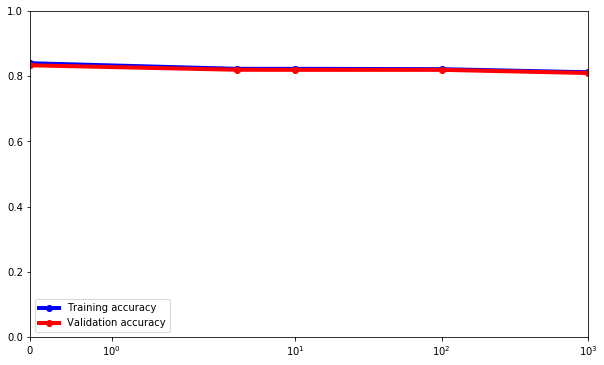

In [17]:
#Plotting the accuracy on training and validation sets over choice of L2 penalty.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

sorted_list = sorted(train_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], 'bo-', linewidth=4, label='Training accuracy')

sorted_list = sorted(validation_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], 'ro-', linewidth=4, label='Validation accuracy')

plt.xscale('symlog')
#plt.axis([0, 1e3, 0.78, 0.786])
plt.axis([0, 1e3, -0, 1])
plt.legend(loc='lower left')
plt.rcParams.update({'font.size': 18})
plt.tight_layout